In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [6]:
train_dir = 'clean-dataset/train'
validation_dir = 'clean-dataset/validation'
image_size = 224

## Experiment 1: Freezing all layers - Same as Transfer Learning
Create the model

In [7]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False
# 모든레이어를 학습하지 않도록 False설정.
# 모든레이어를 학습하면 너무 오래걸린다.
    
    
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv) 
# 이미 학습된 것을 가져다가 쓰겠다

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x00000217F9B1AC48> False
<keras.layers.convolutional.Conv2D object at 0x00000217F9B58188> False
<keras.layers.convolutional.Conv2D object at 0x00000217F9B583C8> False
<keras.layers.pooling.MaxPooling2D object at 0x00000217F9B555C8> False
<keras.layers.convolutional.Conv2D object at 0x00000217E4F40B88> False
<keras.layers.convolutional.Conv2D object at 0x00000217F9B7C408> False
<keras.layers.pooling.MaxPooling2D object at 0x00000217F9B81E48> False
<keras.layers.convolutional.Conv2D object at 0x00000217F9B86988> False
<keras.layers.convolutional.Conv2D object at 0x00000217F9B98D88> False
<keras.layers.convolutional.Conv2D object at 0x00000217F9BAA308> False
<keras.layers.pooling.MaxPooling2D object at 0x00000217F9BBD308> False
<keras.layers.convolutional.Conv2D object at 0x00000217F9BC7DC8> False
<keras.layers.convolutional.Conv2D object at 0x00000217F9BDB688> False
<keras.layers.convolutional.Conv2D object at 0x00000217F9BE1C88> False
<ker

## Experiment 1
Train the model

In [8]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 20 #100으로하면 너무 커서 오류가능성..
val_batchsize = 2

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [9]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/5
30/30 [==============================] - 195s 7s/step - loss: 5.2021 - accuracy: 0.5433 - val_loss: 1.3374 - val_accuracy: 0.7933
Epoch 2/5
30/30 [==============================] - 194s 6s/step - loss: 0.5838 - accuracy: 0.8633 - val_loss: 0.0487 - val_accuracy: 0.9000
Epoch 3/5
30/30 [==============================] - 194s 6s/step - loss: 0.1461 - accuracy: 0.9550 - val_loss: 0.1743 - val_accuracy: 0.9067
Epoch 4/5
30/30 [==============================] - 193s 6s/step - loss: 0.0618 - accuracy: 0.9800 - val_loss: 0.0137 - val_accuracy: 0.8933
Epoch 5/5
30/30 [==============================] - 194s 6s/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0097 - val_accuracy: 0.8800


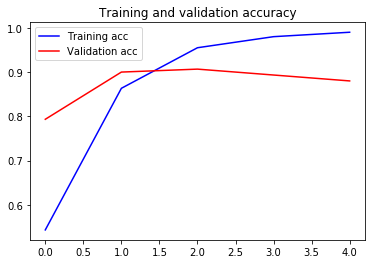

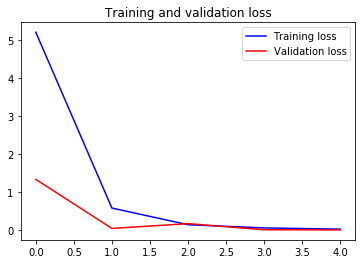

In [10]:
# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()